In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [2]:
# Загрузка данных
df = pd.read_csv('Tempering data for carbon and low alloy steels - Raiipa.csv')

# Удалим строки, где целевая переменная отсутствует
df = df.dropna(subset=['Final hardness (HRC) - post tempering'])

In [3]:
# Список всех химических и термических признаков (без Source, Steel type и Initial hardness)
feature_columns = [
    'Tempering time (s)',
    'Tempering temperature (ºC)',
    'C (%wt)', 'Mn (%wt)', 'P (%wt)', 'S (%wt)', 'Si (%wt)',
    'Ni (%wt)', 'Cr (%wt)', 'Mo (%wt)', 'V (%wt)', 'Al (%wt)', 'Cu (%wt)'
]

X = df[feature_columns]
y = df['Final hardness (HRC) - post tempering']

In [4]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# Нормализация признаков
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Функция для построения графика паритета
def plot_parity(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Истинная твёрдость (HRC)')
    plt.ylabel('Предсказанная твёрдость (HRC)')
    plt.title(f'{title}\n$R^2 = {r2_score(y_true, y_pred):.3f}$')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

Линейная регрессия
Коэффициент детерминации (R²): 0.8555


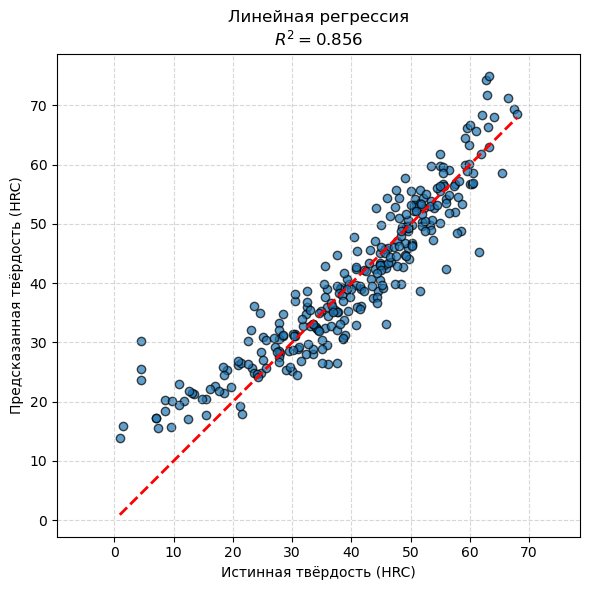

In [11]:
# 1. Простая линейная регрессия
lin_reg = LinearRegression(fit_intercept = True)
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

print("Линейная регрессия")
print(f"Коэффициент детерминации (R²): {r2_score(y_test, y_pred_lin):.4f}")
plot_parity(y_test, y_pred_lin, "Линейная регрессия")


Нейронная сеть (MLPRegressor)
Коэффициент детерминации (R²): 0.9381


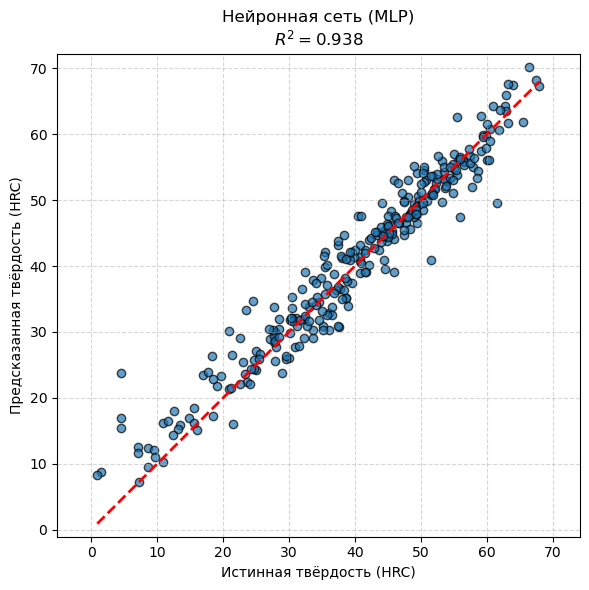

In [8]:
# 2. Нейронная сеть (MLPRegressor)
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=5000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("\nНейронная сеть (MLPRegressor)")
print(f"Коэффициент детерминации (R²): {r2_score(y_test, y_pred_mlp):.4f}")
plot_parity(y_test, y_pred_mlp, "Нейронная сеть (MLP)")


Градиентный бустинг (GradientBoostingRegressor)
Коэффициент детерминации (R²): 0.9848


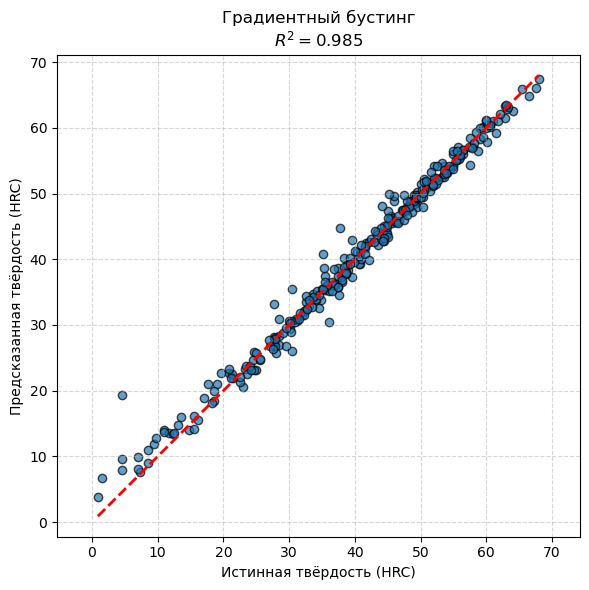

In [9]:
# 3. Градиентный бустинг (GradientBoostingRegressor)
gbr = GradientBoostingRegressor(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)

print("\nГрадиентный бустинг (GradientBoostingRegressor)")
print(f"Коэффициент детерминации (R²): {r2_score(y_test, y_pred_gbr):.4f}")
plot_parity(y_test, y_pred_gbr, "Градиентный бустинг")

In [10]:
# Сравнительная таблица моделей
from sklearn.metrics import r2_score

predictions = {
    "Линейная регрессия": y_pred_lin,
    "Нейронная сеть (MLP)": y_pred_mlp,
    "Градиентный бустинг (GBR)": y_pred_gbr
}

results = []
for name, y_pred in predictions.items():
    r2 = r2_score(y_test, y_pred)
    results.append([name, r2])

comparison_df = pd.DataFrame(results, columns=["Модель", "R²"])
comparison_df = comparison_df.round(4)  # округление до 4 знаков

print("\n Сравнительная таблица моделей:")
print(comparison_df.to_string(index=False))

# Модель с коэффициентом детерминации 0,9848 показывает очень высокую степень соответствия данных, так как значение близко к 1.
# Модель с коэффициентом детерминации 0,9381 имеет высокое значение. Это означает, что модель объясняет большую часть вариации зависимой переменной.
# Модель с коэффициентом детерминации 0,8555 имеет умеренное значение. Модель объясняет существенную часть вариации, но значительная доля остаётся необъяснённой.


 Сравнительная таблица моделей:
                   Модель     R²
       Линейная регрессия 0.8555
     Нейронная сеть (MLP) 0.9381
Градиентный бустинг (GBR) 0.9848
